### Dependencies

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Import Data

In [3]:
df_2015 = pd.read_csv('2015.csv')
# df_2016 = pd.read_csv('WorldHappiness/2016.csv')
# df_2017 = pd.read_csv('WorldHappiness/2017.csv')

print('Dataset downloaded and read into a pandas dataframe!')


Dataset downloaded and read into a pandas dataframe!


#### 2015 

In [6]:
df_2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [4]:
# ["Country", "Region","rank", "score", "std", "economy", "family", "health", "freedom", "corruption", "generosity", "dystopia"]
df_2015.rename(columns={'Happiness Rank': 'Rank', 'Happiness Score': 'Score', 'Standard Error': 'Std', 'Economy ''(GDP per Capita)': 'Economy','Health ''(Life Expectancy)': 'Health', 'Trust ''(Government Corruption)': 'Corruption', 'Dystopia Residual': 'Dystopia'}, inplace=True)
df_2015.head()

,Country,Region,Rank,Score,Std,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### 2016

In [ ]:
df_2016.head(3)

#### 2017

In [ ]:
df_2017.head(3)

### Data Exploration

In [11]:
len(df_2015)

158

In [4]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


### Preprocessing

####  Encoders

In [5]:
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
df_2015['Region_code']  = le.fit_transform(df_2015['Region'])

In [6]:
Region_Nomenclature = df_2015[["Region" , "Region_code"]]
df_2015 = df_2015.drop(columns='Region')
Region_Nomenclature = Region_Nomenclature.drop_duplicates()
Region_Nomenclature.head(5)

,Region,Region_code
0,Western Europe,9
4,North America,5
8,Australia and New Zealand,0
10,Middle East and Northern Africa,4
11,Latin America and Caribbean,3


In [9]:
df_2015.head(2)

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_code
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,9
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,9


#### To wich Region the happiest countries belong to?

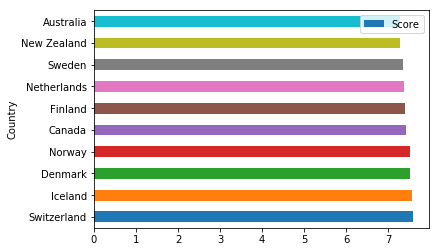

In [7]:
ax = df_2015[:10].plot.barh(x='Country', y='Score', rot=0, )

In [8]:
top_happy_df = df_2015[0:20]
top_happy_df.describe()

,Rank,Score,Std,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia,Region_code
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,7.252950,0.036936,1.294879,1.271807,0.882275,0.605179,0.294460,0.334683,2.569725,6.300000
std,5.91608,0.223947,0.004821,0.152489,0.105351,0.056401,0.069113,0.123983,0.104664,0.417733,3.294333
min,1.00000,6.901000,0.027990,0.955780,0.914510,0.697020,0.413190,0.077850,0.140740,1.969610,0.000000
25%,5.75000,7.085000,0.034010,1.280232,1.236627,0.871428,0.607945,0.183872,0.261952,2.345008,3.750000
50%,10.50000,7.281000,0.036355,1.327865,1.293055,0.894085,0.630870,0.323855,0.336555,2.478870,9.000000
75%,15.25000,7.411250,0.039290,1.351550,1.324695,0.911620,0.643612,0.392803,0.435790,2.640165,9.000000
max,20.00000,7.587000,0.048840,1.563910,1.402230,0.947840,0.669730,0.483570,0.476100,3.602140,9.000000


In [9]:
A = top_happy_df.Region_code.value_counts().index.tolist()
# Region_Nomenclature['Region_code' == A[1]]
happiest_region_nom = Region_Nomenclature['Region_code'] == A[0]
print ("The happiest Region in 2015 Is: ",Region_Nomenclature[happiest_region_nom].Region )

happiest_region = df_2015['Region_code'] == A[0]
df = df_2015[happiest_region]
print ("With a happiness score of:", df.loc[:,"Score"].mean())


The happiest Region in 2015 Is:  0    Western Europe
Name: Region, dtype: object
With a happiness score of: 6.689619047619048


### Machine Learning, Target = Happiness Score

#### Linear Regression Exploration

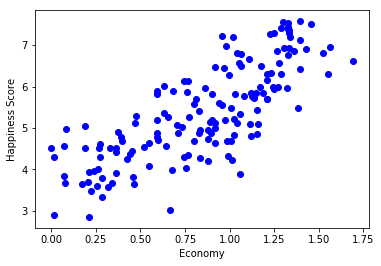

In [10]:
# write your code here
plt.scatter(df_2015.Economy, df_2015.Score, color='blue')
plt.xlabel("Economy")
plt.ylabel("Happiness Score")
plt.show()
# write your code here  df_2015.Freedom,df_2015.Dystopia

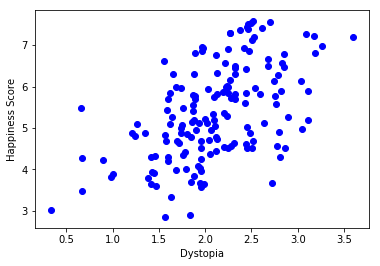

In [11]:
# write your code here
plt.scatter(df_2015.Dystopia, df_2015.Score, color='blue')
plt.xlabel("Dystopia")
plt.ylabel("Happiness Score")
plt.show()
# write your code here  df_2015.Freedom,df_2015.Dystopia

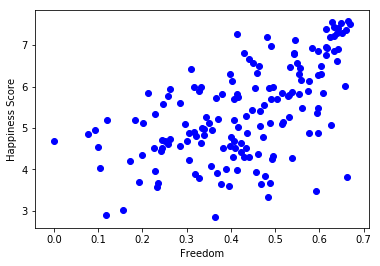

In [12]:
# write your code here
plt.scatter(df_2015.Freedom, df_2015.Score, color='blue')
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")
plt.show()
# write your code here  df_2015.Freedom,df_2015.Dystopia

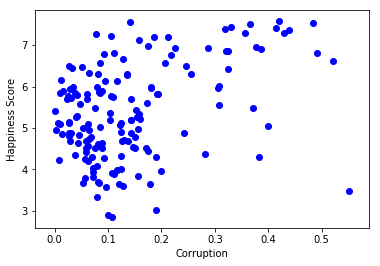

In [13]:
# write your code here
plt.scatter(df_2015.Corruption, df_2015.Score, color='blue')
plt.xlabel("Corruption")
plt.ylabel("Happiness Score")
plt.show()
# write your code here  df_2015.Freedom,df_2015.Dystopia

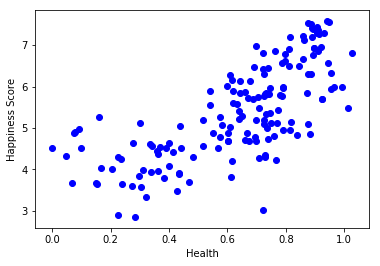

In [14]:
# write your code here
plt.scatter(df_2015.Health, df_2015.Score, color='blue')
plt.xlabel("Health")
plt.ylabel("Happiness Score")
plt.show()
# write your code here  df_2015.Freedom,df_2015.Dystopia

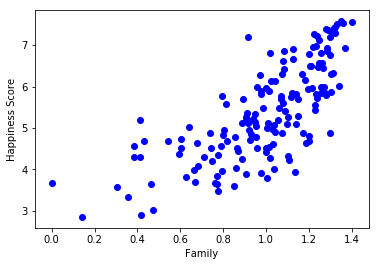

In [15]:
# write your code here
plt.scatter(df_2015.Family, df_2015.Score, color='blue')
plt.xlabel("Family")
plt.ylabel("Happiness Score")
plt.show()
# write your code here  df_2015.Freedom,df_2015.Generosity

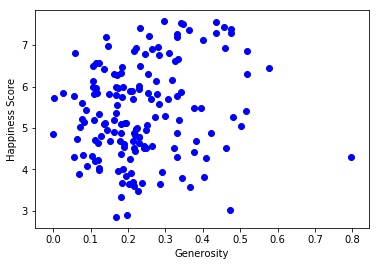

In [16]:
# write your code here
plt.scatter(df_2015.Generosity, df_2015.Score, color='blue')
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.show()
# write your code here  df_2015.Freedom,df_2015.

#### Select variables that can form a liear combination

In [11]:
df = df_2015[["Economy", "Freedom", "Health", "Family", "Score"]]
df.head(10)

,Economy,Freedom,Health,Family,Score
0,1.39651,0.66557,0.94143,1.34951,7.587
1,1.30232,0.62877,0.94784,1.40223,7.561
2,1.32548,0.64938,0.87464,1.36058,7.527
3,1.45900,0.66973,0.88521,1.33095,7.522
4,1.32629,0.63297,0.90563,1.32261,7.427
5,1.29025,0.64169,0.88911,1.31826,7.406
6,1.32944,0.61576,0.89284,1.28017,7.378
7,1.33171,0.65980,0.91087,1.28907,7.364
8,1.25018,0.63938,0.90837,1.31967,7.286
9,1.33358,0.65124,0.93156,1.30923,7.284


#### Split into Training and Test Sets 80% + 20%

In [12]:
msk = np.random.rand(len(df)) < 0.8

#Training Set
train = df[msk]
X_train = train[["Economy", "Freedom", "Health", "Family"]]
Y_train = train[["Score"]]
#Test Set
test = df[~msk]
X_test = test[["Economy", "Freedom", "Health", "Family"]]
Y_test = test[["Score"]]

#### Train the Linear Model

In [13]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 [1.92303493]
Coefficients: 
 [[0.82436356 1.67279455 1.08279883 1.39643888]]


#### Test the Linear Model

In [14]:
test_y = regr.predict(X_test)

#### Evaluation

In [39]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_test - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_test - test_y) ** 2))
print("R2-score: %.2f" % r2_score(Y_test , test_y) )

Mean absolute error: 0.47
Residual sum of squares (MSE): 0.34
R2-score: 0.73


In [64]:
df_comp= test[["Score"]].astype(float)
df_comp['Predicted'] = test_y.tolist()
df_comp.head(10)

,Score,Predicted
2,7.527,[6.8559567649524435]
5,7.406,[6.773732253154549]
8,7.286,[6.7612655542983315]
10,7.278,[6.239871099110873]
11,7.226,[6.353648485164628]
22,6.810,[5.949032099115952]
26,6.670,[5.994623870498463]
29,6.574,[6.054683600750476]
31,6.485,[6.293854385116505]
37,6.298,[6.019966543772812]


In [58]:
df_2015.iloc[86]

Country         Serbia
Rank                87
Score            5.123
Std            0.04864
Economy        0.92053
Family         1.00964
Health         0.74836
Freedom        0.20107
Corruption     0.02617
Generosity     0.19231
Dystopia         2.025
Region_code          1
Name: 86, dtype: object

In [62]:
tunisia = df_2015["Country"] == "Tunisia"
Tun = df_2015[tunisia]
Tun

,Country,Rank,Score,Std,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia,Region_code
106,Tunisia,107,4.739,0.03589,0.88113,0.60429,0.73793,0.26268,0.06358,0.06431,2.12466,4
